# Selective Inference via outcome Randomisation and Mirror Statistics

In [1]:
using Pkg
Pkg.status()

using GLM
using GLMNet
using Distributions
using Random
using StatsPlots
using Plots
using DataFrames

Project selective_inference_project v0.1.0
Status `~/Documents/UiO_Postdoc/Code/git_repositories/SelectiveInference/Project.toml`
  [336ed68f] CSV v0.10.11
⌃ [31c24e10] Distributions v0.25.100
⌃ [38e38edf] GLM v1.8.3
  [8d5ece8b] GLMNet v0.7.2
⌃ [6f49c342] RCall v0.13.17
  [f3b207a7] StatsPlots v0.15.6
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [2]:
include("./utilities/data_generation.jl")
include("./utilities/randomisation_ds.jl")
include("./utilities/mirror_statistic.jl")
include("./utilities/classification_metrics.jl");

In [2]:
include("./wrapper_pipeline_inference.jl");

In [3]:
function print_metrics(;scenario, results)
    println("-------------------- $scenario --------------------")
    
    for (metric, value) in zip(keys(results.class_metrics), results.class_metrics)
        println("$metric ==> $value")
    end
end

print_metrics (generic function with 1 method)

## Simulation on uncorrelated covariates

### Low-dimensional case
30% of coefficients are 0

In [29]:
n = 100
p = 20
prop_zero_coef = 0.3
beta_intercept = 1.
sigma2 = 1.
correlation_coefficients = []
scenario = "Low-Dimensional, No Correlation"

"Low-Dimensional, No Correlation"

In [30]:
Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [34]:
print_metrics(scenario=scenario, results=results)

-------------------- Low-Dimensional, No Correlation --------------------
FDR_rand_plus_MS ==> 0.125
FDR_rand_only ==> 0.0
FDR_MS_only ==> 0.0
TPR_rand_plus_MS ==> 1.0
TPR_rand_only ==> 1.0
TPR_MS_only ==> 1.0


### High-dimensional case
70% of coefficients are 0

In [35]:
n = 100
p = 200
prop_zero_coef=0.7
beta_intercept=1.
sigma2=1.
correlation_coefficients=[]
scenario = "High-Dimensional, No Correlation"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [36]:
print_metrics(scenario=scenario, results=results)

-------------------- High-Dimensional, No Correlation --------------------
FDR_rand_plus_MS ==> 0.37037037037037035
FDR_rand_only ==> 0.3125
FDR_MS_only ==> 0.0
TPR_rand_plus_MS ==> 0.5666666666666667
TPR_rand_only ==> 0.18333333333333332
TPR_MS_only ==> 0.0


## Correlated covariates

### Low-dimensional case
30% of coefficients are 0

In [37]:
n = 100
p = 20
prop_zero_coef=0.3
beta_intercept=1.
sigma2=1.
correlation_coefficients=[0.5, 0.3]
scenario = "Low-Dimensional, With Correlation"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [38]:
print_metrics(scenario=scenario, results=results)

-------------------- Low-Dimensional, With Correlation --------------------
FDR_rand_plus_MS ==> 0.17647058823529413
FDR_rand_only ==> 0.0
FDR_MS_only ==> 0.06666666666666667
TPR_rand_plus_MS ==> 1.0
TPR_rand_only ==> 0.9285714285714286
TPR_MS_only ==> 1.0


### High-dimensional case
70% of coefficients are 0

In [39]:
n = 100
p = 200
prop_zero_coef=0.7
beta_intercept=1.
sigma2=1.
correlation_coefficients=[0.5, 0.3]
scenario = "High-Dimensional, With Correlation"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [40]:
print_metrics(scenario=scenario, results=results)

-------------------- High-Dimensional, With Correlation --------------------
FDR_rand_plus_MS ==> 0.375
FDR_rand_only ==> 0.0
FDR_MS_only ==> 0.2
TPR_rand_plus_MS ==> 0.08333333333333333
TPR_rand_only ==> 0.0
TPR_MS_only ==> 0.06666666666666667


### High-dimensional case, 20% on non-zero coefficients, positive and negative correlations

In [42]:
n = 100
p = 200
prop_zero_coef=0.8
beta_intercept=1.
sigma2=1.
correlation_coefficients=[0.3, -0.2]
scenario = "High-Dimensional, With positive and negative Correlations and 80% of zero coefficients"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [43]:
print_metrics(scenario=scenario, results=results)

-------------------- High-Dimensional, With positive and negative Correlations and 80% of zero coefficients --------------------
FDR_rand_plus_MS ==> 0.3076923076923077
FDR_rand_only ==> 0.36363636363636365
FDR_MS_only ==> 0.0
TPR_rand_plus_MS ==> 0.45
TPR_rand_only ==> 0.35
TPR_MS_only ==> 0.05


## Focus on High-Dimensional scenarios
Gradually increase the correlation structure and the proportion of non-zero coefficients

In [94]:
correlations_first_offdiag = [0., 0.1, 0.2, 0.3, 0.4, 0.5]
correlations_second_offdiag = [0., 0.1, 0.2, 0.3, 0.4]
proportions_zero_coef = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7];

In [95]:
metrics_names = String[]
for metric_name in keys(results.class_metrics)
    push!(metrics_names, String(metric_name))
end

In [96]:
tot_simulations = length(correlations_first_offdiag) * length(correlations_second_offdiag) * length(proportions_zero_coef)
colnames = append!(["corr_first", "corr_second", "prop_non_zero"], metrics_names);

In [97]:
df_metrics = DataFrames.DataFrame([name => [] for name in colnames]);

In [99]:
n = 100
p = 200
beta_intercept=1.
sigma2=1.
n_replica = 10

for corr_first in correlations_first_offdiag
    println("Executing correlation $corr_first")
    for corr_sec in correlations_second_offdiag
        for prop_zero in proportions_zero_coef

            Random.seed!(1345)
            scenario = "Correlations: $corr_first and $corr_sec. Proportion $prop_zero of zero coefficients"
            correlation_coefficients=[corr_first, corr_sec]
            
            # Initialise to 0
            average_metrics = zeros(length(keys(results.class_metrics)))

            # Do an average over n replications for each combination
            for replica in range(1, n_replica)
                results = wrapper_pipeline_inference.wrapper_randomisation_inference(
                    n=n,
                    p=p,
                    correlation_coefficients=correlation_coefficients,
                    prop_zero_coef=prop_zero,
                    sigma2=sigma2,
                    gamma_randomisation=1.,
                    fdr_level=0.1
                )
                for (metric, value) in enumerate(results.class_metrics)
                    average_metrics[metric] += value
                end
                
            end

            push!(
                df_metrics,
                append!(
                    [
                        corr_first,
                        corr_sec,
                        1-prop_zero
                    ],
                    average_metrics ./ n_replica
                )
            )

        end
    end
end
;

Executing correlation 0.0


Executing correlation 0.1


Executing correlation 0.2


Executing correlation 0.3


Executing correlation 0.4


Executing correlation 0.5


In [110]:
df_metrics

Row,corr_first,corr_second,prop_non_zero,FDR_rand_plus_MS,FDR_rand_only,FDR_MS_only,TPR_rand_plus_MS,TPR_rand_only,TPR_MS_only
,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,0.0,0.0,0.05,0.200699,0.116426,0.411107,0.95,0.87,0.47
2,0.0,0.0,0.1,0.244239,0.0778694,0.215476,0.735,0.585,0.16
3,0.0,0.0,0.15,0.257073,0.0615119,0.247348,0.716667,0.486667,0.13
4,0.0,0.0,0.2,0.34801,0.150432,0.247965,0.6,0.33,0.0975
5,0.0,0.0,0.25,0.379193,0.170544,0.324746,0.542,0.222,0.092
6,0.0,0.0,0.3,0.350426,0.279158,0.18381,0.383333,0.14,0.0583333
7,0.0,0.1,0.05,0.172925,0.126566,0.281436,0.97,0.9,0.44
8,0.0,0.1,0.1,0.224732,0.105701,0.129048,0.855,0.67,0.245
9,0.0,0.1,0.15,0.256888,0.13246,0.414899,0.67,0.483333,0.103333


In [7]:
using CSV
# CSV.write("./simulation_MS_with_randomisation.csv", df_metrics)

df_metrics = CSV.read("./simulation_MS_with_randomisation.csv", DataFrames.DataFrame);

Row,corr_first,corr_second,prop_non_zero,FDR_rand_plus_MS,FDR_rand_only,FDR_MS_only,TPR_rand_plus_MS,TPR_rand_only,TPR_MS_only
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.05,0.200699,0.116426,0.411107,0.95,0.87,0.47
2,0.0,0.0,0.1,0.244239,0.0778694,0.215476,0.735,0.585,0.16
3,0.0,0.0,0.15,0.257073,0.0615119,0.247348,0.716667,0.486667,0.13
4,0.0,0.0,0.2,0.34801,0.150432,0.247965,0.6,0.33,0.0975
5,0.0,0.0,0.25,0.379193,0.170544,0.324746,0.542,0.222,0.092
6,0.0,0.0,0.3,0.350426,0.279158,0.18381,0.383333,0.14,0.0583333
7,0.0,0.1,0.05,0.172925,0.126566,0.281436,0.97,0.9,0.44
8,0.0,0.1,0.1,0.224732,0.105701,0.129048,0.855,0.67,0.245
9,0.0,0.1,0.15,0.256888,0.13246,0.414899,0.67,0.483333,0.103333


In [ ]:
df_metrics[!, "round_prop_non_zero"] = round.(df_metrics[!, "prop_non_zero"], digits=3);

In [8]:
# Check only corr first = 0.5 and prop non-0 coef = 0.3
df_metrics[
    (df_metrics[:, "corr_first"] .== 0.5) .& (df_metrics[:, "prop_non_zero"] .== (1 - 0.7)),
    :]


Row,corr_first,corr_second,prop_non_zero,FDR_rand_plus_MS,FDR_rand_only,FDR_MS_only,TPR_rand_plus_MS,TPR_rand_only,TPR_MS_only
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.5,0.0,0.3,0.369695,0.233577,0.126327,0.366667,0.133333,0.0916667
2,0.5,0.1,0.3,0.437203,0.109178,0.291014,0.381667,0.153333,0.0683333
3,0.5,0.2,0.3,0.350978,0.208686,0.223333,0.393333,0.185,0.0683333
4,0.5,0.3,0.3,0.361671,0.181274,0.34293,0.331667,0.166667,0.103333
5,0.5,0.4,0.3,0.40263,0.203561,0.291159,0.4,0.11,0.101667


In [175]:
# Check only corr first = 0.5 and corr second = 0.3
df_metrics[
    (df_metrics[:, "corr_first"] .== 0.5) .& (df_metrics[:, "corr_second"] .== 0.3),
    :]


Row,corr_first,corr_second,prop_non_zero,FDR_rand_plus_MS,FDR_rand_only,FDR_MS_only,TPR_rand_plus_MS,TPR_rand_only,TPR_MS_only
,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,0.5,0.3,0.05,0.194725,0.174867,0.261876,0.91,0.81,0.38
2,0.5,0.3,0.1,0.225023,0.136854,0.242619,0.815,0.65,0.2
3,0.5,0.3,0.15,0.271382,0.218427,0.413616,0.566667,0.376667,0.216667
4,0.5,0.3,0.2,0.276585,0.204885,0.375401,0.5275,0.2525,0.1075
5,0.5,0.3,0.25,0.397839,0.315079,0.385,0.346,0.136,0.046
6,0.5,0.3,0.3,0.361671,0.181274,0.34293,0.331667,0.166667,0.103333


In [9]:
function scatter_by_variable(;df_variable, array_values)
    
    plot_scatter = scatter(
        df_metrics[df_metrics[:, df_variable] .== array_values[1], "FDR_rand_plus_MS"],
        df_metrics[df_metrics[:, df_variable] .== array_values[1], "FDR_MS_only"],
        label="$df_variable : $(round(array_values[1], digits=3))",
        color=palette(:tab10)[1]
    )
    title!("FDR Rand+MS vs MS only")
    xlabel!("Rand + MS")
    ylabel!("MS Only")
    
    color = 1
    for variable_value in array_values[2:length(array_values)]
        color += 1
        scatter!(
            plot_scatter,
            df_metrics[df_metrics[:, df_variable] .== variable_value, "FDR_rand_plus_MS"],
            df_metrics[df_metrics[:, df_variable] .== variable_value, "FDR_MS_only"],
            label="$df_variable : $(round(variable_value, digits=3))",
            color=palette(:tab10)[color]
        )
    end
    plot_scatter

end;

In [ ]:
function double_boxplot(;df, group_var, var_one, var_two, title_plot)
    max_y = maximum(
        (maximum(df_metrics[!, var_one]),
        maximum(df_metrics[!, var_two]))
    )
    min_y = minimum(
        (minimum(df_metrics[!, var_one]),
        minimum(df_metrics[!, var_two]))
    )
    l = @layout [grid(1, 2)]
    p1 = @df df boxplot(string.(cols(group_var)), cols(var_one), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_one))
    p2 = @df df_metrics boxplot(string.(cols(group_var)), cols(var_two), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_two))
    all_p = plot(p1, p2, layout = l)
    all_p[:plot_title] = title_plot
    plot(all_p)
end;

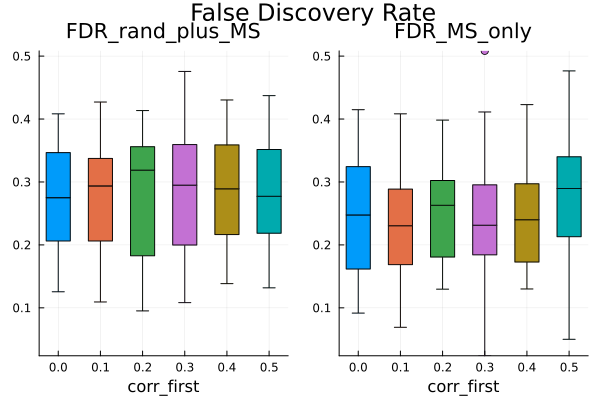

In [143]:
double_boxplot(df=df_metrics, group_var=:corr_first,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate"
)

There is not much distinction in FDR when looking at the strength of the first correlation, over all other combinations

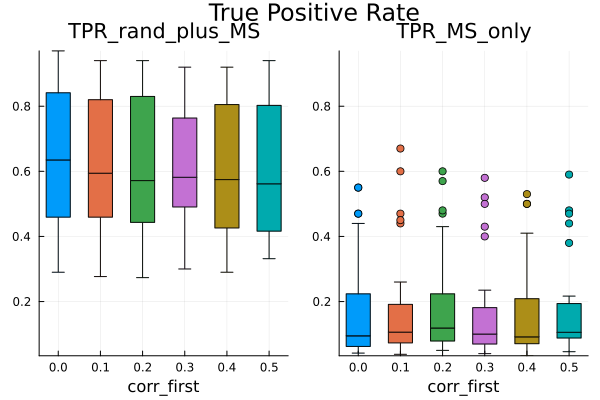

In [145]:
double_boxplot(df=df_metrics, group_var=:corr_first,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate"
)

True Positive Rate is consistently higher for Randomisation + MS compared to MS only, for different levels of correlation

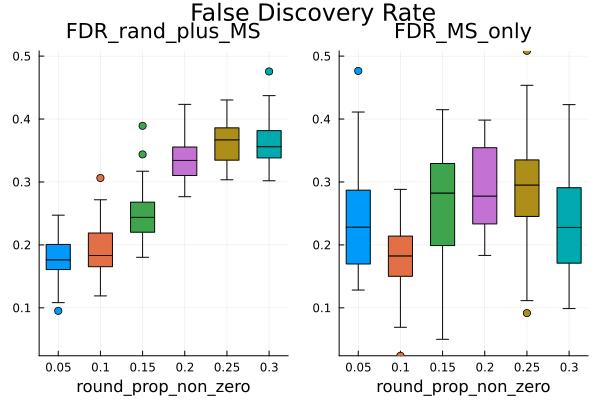

In [141]:
double_boxplot(df=df_metrics, group_var=:round_prop_non_zero,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate"
)

With Randomistion + MS, a higher proportion of non-zero coefficients leads to a higher FDR, while with MS only there is no such trend

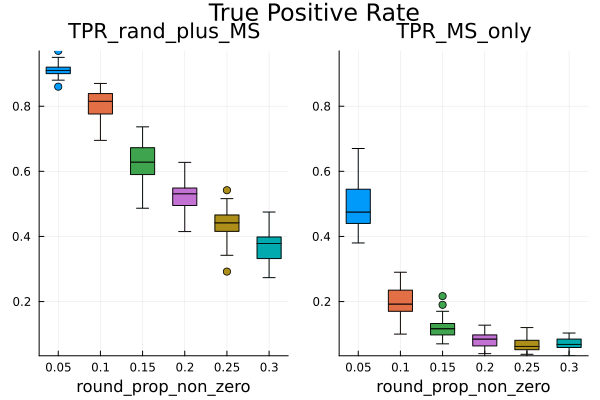

In [146]:
double_boxplot(df=df_metrics, group_var=:round_prop_non_zero,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate"
)

Again the TPR for Randomisation + MS is consistently higher than MS only, for different levels of proportion of non-zero coeffiecients

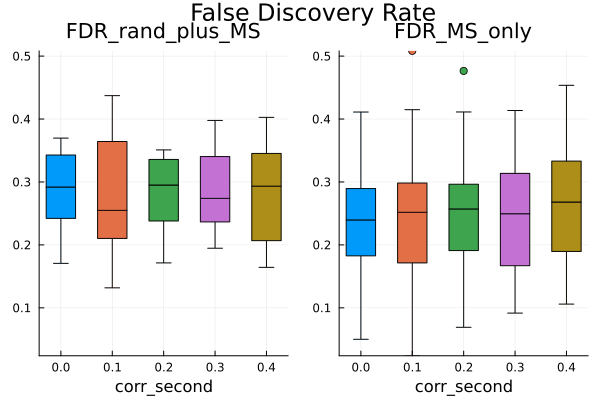

In [147]:
double_boxplot(df=df_metrics[df_metrics.corr_first .== 0.5, :],
    group_var=:corr_second,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate"
)

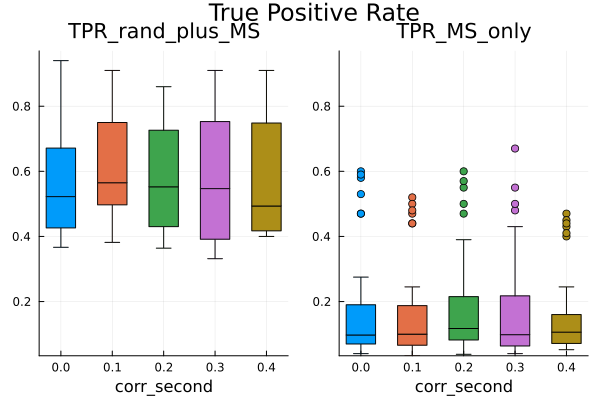

In [149]:
double_boxplot(df=df_metrics[df_metrics.corr_first .== 0.5, :],
    group_var=:corr_second,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate"
)

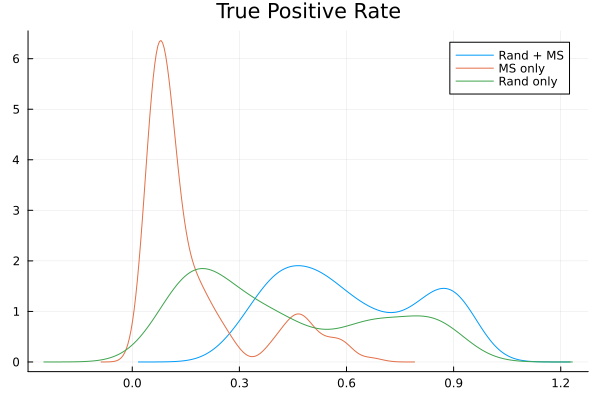

In [15]:
density(df_metrics.TPR_rand_plus_MS, label="Rand + MS")
title!("True Positive Rate")
density!(df_metrics.TPR_MS_only, label="MS only")
density!(df_metrics.TPR_rand_only, label="Rand only")

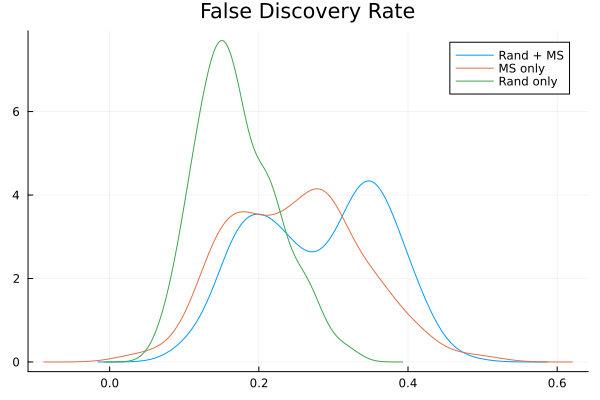

In [16]:
density(df_metrics.FDR_rand_plus_MS, label="Rand + MS")
title!("False Discovery Rate")
density!(df_metrics.FDR_MS_only, label="MS only")
density!(df_metrics.FDR_rand_only, label="Rand only")

# Summary
Performance comparison of using **Mirror Statistic with Randomisation** (Rand+MS) versus using **standard Mirror Statistic** (MS only), which refers to Mirror Statistic used with a simple Data Splitting mechanism. The metrics tracked here are False Discovery Rate (FDR) and True Positive Rate (TPR, aka Sensitivity, Recall, Hit Rate).  
In addition **Randomisation only** (Rand only) is included in the comparison. *However*, using only Randomisation does not allow for a direct adjustment and control of FDR, therefore empirical FDR is calculated on rejections based on p-values below the 5% threshold.  
Simulations have been done for a standard high-dimensional linear regression with n=100 observations and p=200 covariates. 10 replications have been made for each combination of the following:
- The proportion of non-zero coefficients varied between 0.05 to 0.3
- Covarites are generted from a multivariate Normal distribution with different covariance structure
    - Identity matrix
    - Toeplitz structure, with first off-diagonal correlation coefficients ranging from 0 to 0.5 and second off-diagonal correlation coefficients ranging from 0 to 0.4

### Key takeways:
- TPR is considerably higher for Rand+MS than for MS only, over all scenarios. This could imply a higher power using Randomistion to "split" the data between variable selection and inference on coeffiecients
- FDR is approximately the same for both methods over all scenarios.
    - For Rand + MS, the FDR grows as the proportion of non-zero coefficients grows, which is intuitive as there is less information for a higher number of coefficients to estimate. However, it is pretty much stable for MS only, with some higher variability
- To note that both methods using MS didn't really achieved the FDR control that was set up, i.e. 10% in this simulation. This can be probably due to the violation of the assumption for the use of Mirror Statistics
    